In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
from IPython.display import display, HTML
# import pprint

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# chemin en modifer
chemin = "/Users/thomassinapi/Desktop/M1 Data Science/TER/dataprojectstage_masterUPS.xlsx"
pd.set_option('display.max_columns', None)

df1 = pd.read_excel(chemin)
df1 = df1.drop(columns=['ID'])

In [69]:
colonnes = df1.columns
colonnes.to_list()

['Job tenure',
 'Age',
 'Car price',
 'Funding amount',
 'Down payment',
 'Loan duration',
 'Monthly payment',
 'Credit event',
 'Married',
 'Homeowner',
 'Default (y, target variable)']

In [158]:

df = df1

# Séparer les features et la cible et supprimer les colonnes inutiles
X = df.drop(columns=['Default (y, target variable)'])

y = df['Default (y, target variable)']

for feature in X.columns:
    tree = DecisionTreeClassifier(max_depth=1, random_state=42)  # max_depth=1 pour un arbre avec une seule division
    tree.fit(X[[feature]], y)
    
    threshold = tree.tree_.threshold[0]  # Prendre le seuil du premier noeud (et unique dans notre cas)
    
    df[f'{feature} <= {threshold}'] = (X[feature] <= threshold).astype(int)

df.head()


,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)",Job tenure <= 2.5,Age <= 27.5,Car price <= 21881.0,Funding amount <= 18272.0,Down payment <= 0.5,Loan duration <= 48.5,Monthly payment <= 0.08168300613760948,Credit event <= 0.5,Married <= 0.5,Homeowner <= 0.5
0,34,55,4875,3087,0,36,0.047895,0,1,1,0,0,0,1,1,1,1,1,1,0,0
1,5,29,13000,13000,0,60,0.091667,0,0,0,1,0,0,1,1,1,0,0,1,1,1
2,14,38,17190,14190,0,60,0.088235,0,0,0,0,0,0,1,1,1,0,0,1,1,1
3,16,37,22773,23568,0,48,0.110084,0,1,1,0,0,0,0,0,1,1,0,1,0,0
4,1,61,7700,8526,0,48,0.123404,0,1,0,1,1,0,1,1,1,1,0,1,0,1


Seuil pour 'Loan duration': 48.5
Seuil pour 'Car price': 13094.5
Seuil pour 'Job tenure': 48.5
Seuil pour 'Age': 13094.5


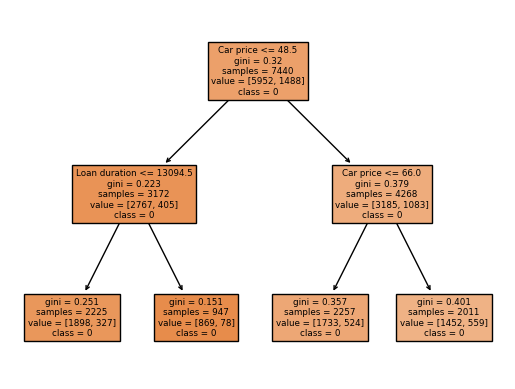

In [28]:
X = df1[(['Loan duration', 'Car price'])]  #Car price<48.5_Loan duration<13094.5 ['Loan duration', 'Car price']
y = df1['Default (y, target variable)']

# Créer et ajuster l'arbre de décision
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X, y)

# Récupérer les seuils de l'arbre
threshold1 = dt.tree_.threshold[0]
threshold2 = dt.tree_.threshold[1]

# print la vraible relié à chaque seuil
feature_index1 = dt.tree_.feature[0]
feature_index2 = dt.tree_.feature[1]

feature_name1 = X.columns[feature_index1]
feature_name2 = X.columns[feature_index2]

print(f"Seuil pour '{feature_name1}': {threshold1}")
print(f"Seuil pour '{feature_name2}': {threshold2}")

plot_tree(dt, feature_names=['Car price', 'Loan duration'], filled=True, class_names=['0', '1'])
print(f"Seuil pour 'Job tenure': {threshold1}")
print(f"Seuil pour 'Age': {threshold2}")


In [35]:
from sklearn.tree import DecisionTreeClassifier
from itertools import combinations
import pandas as pd

# Assurez-vous que df1 est votre dataframe chargé avec toutes les variables nécessaires
# Et que 'Default (y, target variable)' est la colonne de la variable cible

# On extrait toutes les variables sauf la variable cible
variables = [col for col in df1.columns if col != 'Default (y, target variable)']

# Initialisation d'un dictionnaire pour stocker les arbres de décision
decision_trees = {}

# Pour chaque paire de variables, entraîner un arbre de décision et créer des variables binaires
for pair in combinations(variables, 2):
    X = df1[list(pair)]
    y = df1['Default (y, target variable)']
    
    # Créer et ajuster l'arbre de décision
    dt = DecisionTreeClassifier(max_depth=2)
    dt.fit(X, y)
    
    # Récupérer les seuils de l'arbre
    threshold1 = dt.tree_.threshold[0]
    threshold2 = dt.tree_.threshold[1]
    
    # print la vraible relié à chaque seuil
    feature_index1 = dt.tree_.feature[0]
    feature_index2 = dt.tree_.feature[1]

    feature_name1 = X.columns[feature_index1]
    feature_name2 = X.columns[feature_index2]
    
    # Créer les nouvelles variables pour le dataframe
    # Les variables sont nommées selon les variables et les seuils identifiés
    new_var_name1 = f"{feature_name1}<{threshold1}"
    new_var_name2 = f"{feature_name2}<{threshold2}"
    interaction_var_name = f'{feature_name1}<{threshold1}_{feature_name2}<{threshold2}'
    # print(interaction_var_name)
    df1[interaction_var_name] = (X[feature_name1] <= threshold1) & (X[feature_name2] <= threshold2)
    
    # Sauvegarder l'arbre de décision
    decision_trees[pair] = dt




[Text(0.5, 0.8333333333333334, 'Funding amount <= 18272.0\ngini = 0.32\nsamples = 7440\nvalue = [5952, 1488]\nclass = 0'), Text(0.25, 0.5, 'Monthly payment <= 0.082\ngini = 0.291\nsamples = 6385\nvalue = [5257, 1128]\nclass = 0'), Text(0.125, 0.16666666666666666, 'gini = 0.232\nsamples = 2686\nvalue = [2327, 359]\nclass = 0'), Text(0.375, 0.16666666666666666, 'gini = 0.329\nsamples = 3699\nvalue = [2930, 769]\nclass = 0'), Text(0.75, 0.5, 'Monthly payment <= 0.156\ngini = 0.45\nsamples = 1055\nvalue = [695, 360]\nclass = 0'), Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 681\nvalue = [506, 175]\nclass = 0'), Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 374\nvalue = [189, 185]\nclass = 0')]

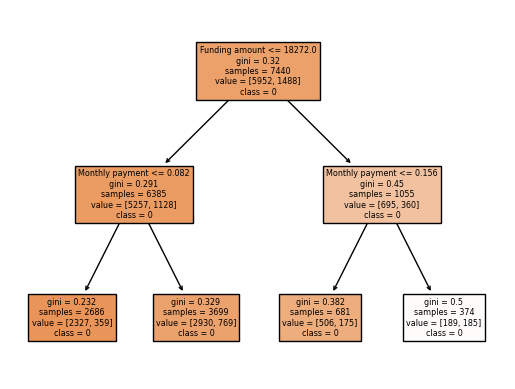

In [211]:
plot_tree(decision_trees[('Monthly payment', 'Funding amount')], feature_names=['Monthly payment', 'Funding amount'], filled=True, class_names=['0', '1'])

In [36]:
df1

,Job tenure,Age,Car price,Funding amount,Down payment,Loan duration,Monthly payment,Credit event,Married,Homeowner,"Default (y, target variable)",Job tenure<2.5_Age<42.5,Job tenure<2.5_Car price<21881.0,Job tenure<2.5_Funding amount<18647.0,Job tenure<2.5_Down payment<0.5,Job tenure<2.5_Loan duration<48.5,Job tenure<2.5_Monthly payment<0.08163914829492569,Job tenure<2.5_Credit event<0.5,Job tenure<2.5_Married<0.5,Job tenure<2.5_Homeowner<0.5,Age<27.5_Age<21.5,Age<27.5_Funding amount<19361.0,Funding amount<18272.0_Car price<18121.0,Down payment<0.5_Car price<21881.0,Loan duration<48.5_Car price<13094.5,Monthly payment<0.08168300613760948_Car price<11482.5,Credit event<0.5_Car price<21881.0,Married<0.5_Car price<16372.0,Homeowner<0.5_Car price<21875.0,Funding amount<18272.0_Down payment<0.5,Loan duration<48.5_Funding amount<29813.5,Funding amount<18272.0_Monthly payment<0.08168300613760948,Funding amount<18272.0_Credit event<0.5,Married<0.5_Funding amount<17940.5,Homeowner<0.5_Funding amount<18041.0,Loan duration<48.5_Down payment<0.5,Monthly payment<0.08168300613760948_Down payment<0.5,Credit event<0.5_Down payment<0.5,Married<0.5_Down payment<0.5,Homeowner<0.5_Down payment<0.5,Loan duration<48.5_Monthly payment<0.10703414306044579,Loan duration<48.5_Credit event<0.5,Married<0.5_Loan duration<54.0,Homeowner<0.5_Loan duration<48.5,Monthly payment<0.08168300613760948_Credit event<0.5,Married<0.5_Monthly payment<0.10491345077753067,Homeowner<0.5_Monthly payment<0.1306847557425499,Married<0.5_Credit event<0.5,Homeowner<0.5_Credit event<0.5,Homeowner<0.5_Married<0.5
0,34,55,4875,3087,0,36,0.047895,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,True,False,False,True,True,True,False,False,True,True,False,False,True,False,False,False,False,False
1,5,29,13000,13000,0,60,0.091667,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,True,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True
2,14,38,17190,14190,0,60,0.088235,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,True,False,False,True,True,True,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True
3,16,37,22773,23568,0,48,0.110084,0,1,1,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False
4,1,61,7700,8526,0,48,0.123404,0,1,0,1,False,True,True,True,True,False,True,False,True,False,False,True,True,True,False,True,False,True,True,True,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7435,1,24,17990,17990,0,72,0.126000,0,0,1,0,True,True,True,True,False,False,True,True,False,False,True,True,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False
7436,2,43,23000,24418,0,72,0.165501,0,1,0,0,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False
7437,1,22,16990,18283,0,60,0.086842,0,0,0,1,True,True,True,True,False,False,True,True,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,True,True,True,True,True
7438,1,27,13490,6426,1,36,0.103889,0,0,0,0,True,True,True,False,True,False,True,True,True,False,True,True,False,Fal

-----

-----

-----

-----

In [37]:
from sklearn.model_selection import train_test_split
X = df1.drop("Default (y, target variable)", axis=1)
y = df1["Default (y, target variable)"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"TRAIN SIZE: {X_train.shape[0], y_train.shape[0]} -> {X_train.shape[0] / X.shape[0] * 100:.2f}%")
# print(f"VAL   SIZE: {X_val.shape[0], y_val.shape[0]} -> {X_val.shape[0] / X.shape[0] * 100:.2f}%")
print(f"TEST  SIZE: {X_test.shape[0], y_test.shape[0]} -> {X_test.shape[0] / X.shape[0] * 100:.2f}%")

# print repartition des classes dans chaque set
print(f"TRAIN: {y_train.value_counts(normalize=True)}")
# print(f"VAL  : {y_val.value_counts(normalize=True)}")
print(f"TEST : {y_test.value_counts(normalize=True)}")

TRAIN SIZE: (5952, 5952) -> 80.00%
TEST  SIZE: (1488, 1488) -> 20.00%
TRAIN: 0    0.799731
1    0.200269
Name: Default (y, target variable), dtype: float64
TEST : 0    0.801075
1    0.198925
Name: Default (y, target variable), dtype: float64


In [38]:
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import display, HTML
from sklearn.metrics import r2_score

def evaluate_classifier(clf, display_html= True):
    name = getattr(clf, 'name', clf.__class__.__name__)
    clf.fit(X_train, y_train)

    # Vérifie si le classificateur a une méthode `predict_proba`
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]  # scores de la classe positive
        auc_score = roc_auc_score(y_test, y_proba)
    elif hasattr(clf, "decision_function"):  # Utiliser `decision_function` si disponible
        y_scores = clf.decision_function(X_test)
        auc_score = roc_auc_score(y_test, y_scores)
    else:
        auc_score = None

    y_pred = clf.predict(X_test)
    balanced_score = balanced_accuracy_score(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores_balanced_accuracy = cross_val_score(clf, X_train, y_train, cv=5, scoring='balanced_accuracy')
    mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)

    if display_html:
        display(HTML(
            f"<h2>{name}</h2>"
            f"<span style='color:yellow;'><b>Balanced accuracy: {balanced_score:7.2%}</b></span> <br/>"
            f"<br/>"
            f"Cross-validation score (Balanced Accuracy): <span style='color:yellow;'> <b>{mean_cv_score_balanced_accuracy:7.2%}</b></span>  <br/>"
            f"<br/>"
            f"AUC: <b>{auc_score:7.2%}</b> <br/>" if auc_score is not None else ""
            f"<br/>"
        ))
    return round(balanced_score,3), round(auc_score,3)


In [46]:
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.over_sampling import SMOTE


# Appliquer SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ajuster la régression logistique
lreg = LogisticRegression(C=1000, max_iter=1000, penalty='l2', solver='liblinear')
lreg.fit(X_train_resampled, y_train_resampled)

# Maintenant, lreg est votre modèle de régression logistique ajusté sur les données suréchantillonnées

LogisticRegression(C=1000, max_iter=1000, solver='liblinear')

In [62]:
y_pred = lreg.predict(X_test)
balanced_score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy: {balanced_score:.2%}")

cv_scores_balanced_accuracy = cross_val_score(lreg, X_train_resampled, y_train_resampled, cv=5, scoring='balanced_accuracy')
mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)
print(f"Cross-validation score (Balanced Accuracy): {mean_cv_score_balanced_accuracy:.2%}")

#print auc
y_proba = lreg.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)

print(f"AUC: {auc_score:.2%}")


Balanced accuracy: 68.11%
Cross-validation score (Balanced Accuracy): 76.43%
AUC: 74.78%


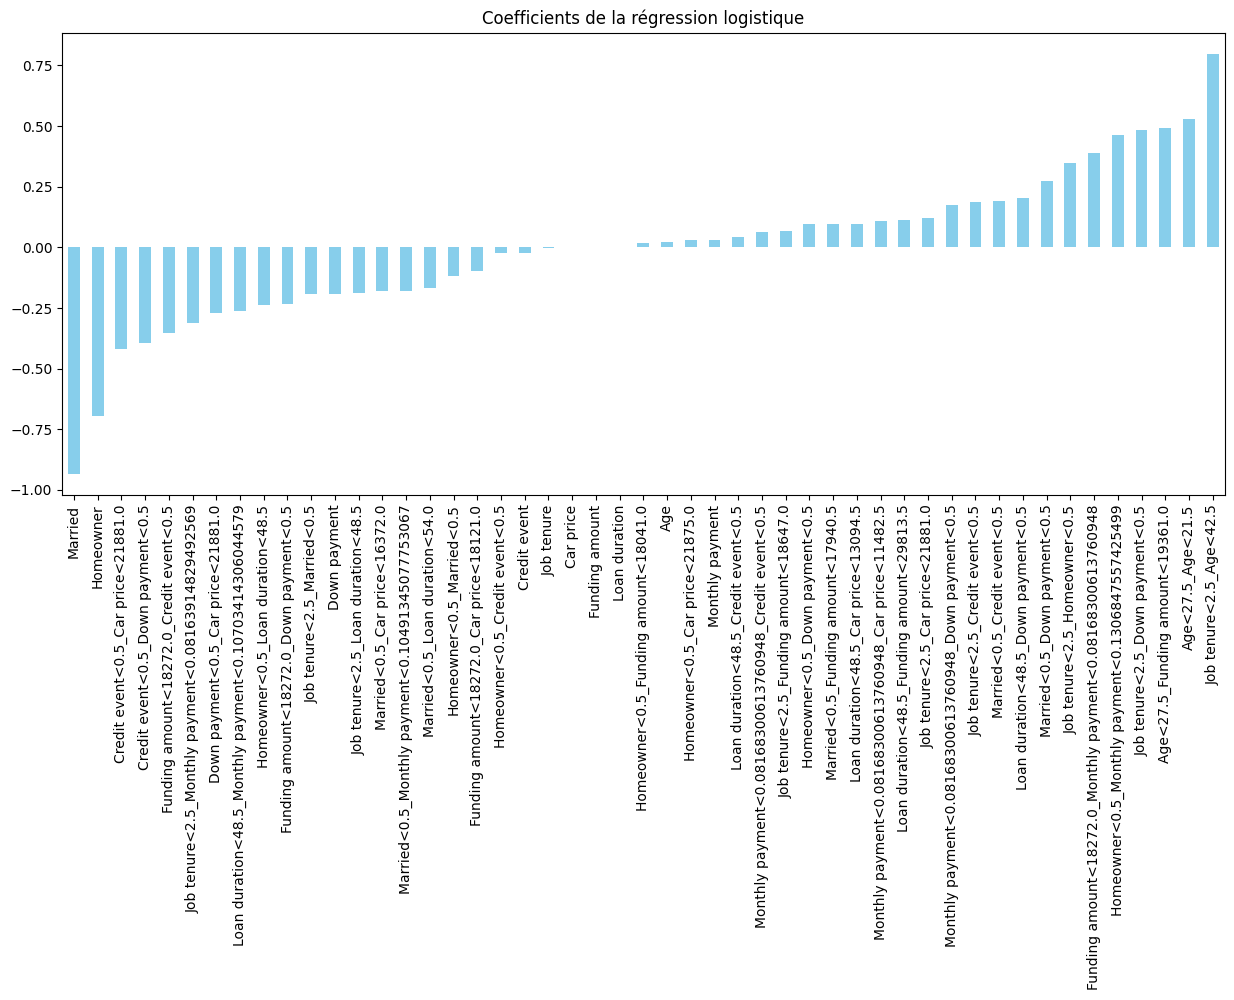

In [51]:
#plot les coefficients de la régression logistique triés par valeur
coefs = pd.Series(lreg.coef_[0], index=X_train.columns).sort_values()
coefs.plot(kind="bar", color='skyblue', figsize=(15, 6))
plt.title("Coefficients de la régression logistique")
plt.show()


In [56]:
from piml.models import ReluDNNClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ajuster la régression logistique
relu = ReluDNNClassifier(hidden_layer_sizes=(40, 40), l1_reg=0.0008, batch_size=500, learning_rate=0.001)
relu.fit(X_train_resampled, y_train_resampled)


ReluDNNClassifier(l1_reg=0.0008)

In [60]:
y_pred = relu.predict(X_test)
balanced_score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy: {balanced_score:.2%}")

cv_scores_balanced_accuracy = cross_val_score(lreg, X_train_resampled, y_train_resampled, cv=5, scoring='balanced_accuracy')
mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)
print(f"Cross-validation score (Balanced Accuracy): {mean_cv_score_balanced_accuracy:.2%}")

#print auc
y_proba = relu.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)

print(f"AUC: {auc_score:.2%}")


Balanced accuracy: 65.07%
Cross-validation score (Balanced Accuracy): 76.66%
AUC: 75.51%


In [61]:
from piml.models import ReluDNNClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Ajuster la régression logistique
relu = RandomForestClassifier()
relu.fit(X_train_resampled, y_train_resampled)

y_pred = relu.predict(X_test)
balanced_score = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced accuracy: {balanced_score:.2%}")

cv_scores_balanced_accuracy = cross_val_score(lreg, X_train_resampled, y_train_resampled, cv=5, scoring='balanced_accuracy')
mean_cv_score_balanced_accuracy = np.mean(cv_scores_balanced_accuracy)
print(f"Cross-validation score (Balanced Accuracy): {mean_cv_score_balanced_accuracy:.2%}")

#print auc
y_proba = relu.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_proba)

print(f"AUC: {auc_score:.2%}")


Balanced accuracy: 65.15%
Cross-validation score (Balanced Accuracy): 76.43%
AUC: 74.78%
